In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import DBSCAN


In [7]:
df = pd.read_csv("wine-clustering.csv")
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


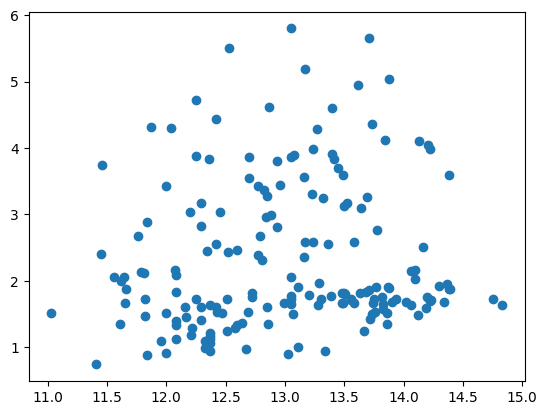

In [8]:
plt.scatter(df.values[:, 0], df.values[:,1])

Estimated number of clusters: 0
Estimated number of noise points: 178
['y', 'b', 'g', 'r']


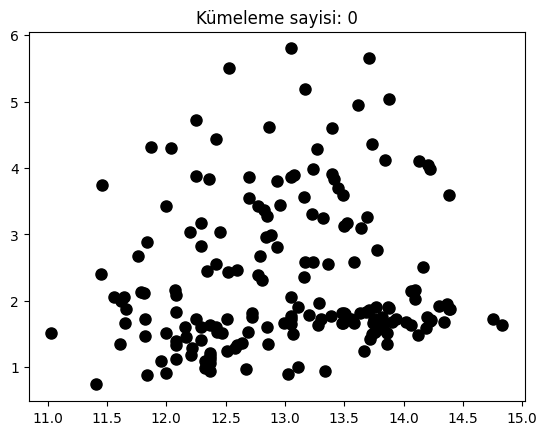

In [9]:
X = df.values

db = DBSCAN(eps=2, min_samples=4).fit(X) # X veri kümesi DBSCAN üzerinde uygulanır.
core_samples  = np.zeros_like(db.labels_, dtype = bool)
core_samples[db.core_sample_indices_] = True
labels = db.labels_
n_noise_ = list(labels).count(-1)

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0) # Küme sayısını belirler.
uniq_labels = set(labels)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

colors = ['y','b','g','r']
print(colors)

for k, col in zip(uniq_labels, colors):
    if k == -1:
        col= 'k'
    class_member_ara= (labels == k)

    xy = X[class_member_ara & core_samples]
    
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor='k',
            markersize=8)
noise_mask= (labels == -1)
noise_points= X[noise_mask]
plt.plot(noise_points[:,0], noise_points[:,1],'o', markerfacecolor='black',markeredgecolor='black', markersize=8, label='gürültü')
plt.title('Kümeleme sayisi: %d' % n_clusters_)
plt.show()

In [10]:
db.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)